ARTI308 - Machine Learning
# Seaborn Overview

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.




## Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

## Imports

In [1]:
import seaborn as sns # Imports the seaborn library and aliases it as `sns`.
%matplotlib inline # Configures matplotlib to display plots directly in the notebook output.

UsageError: unrecognized arguments: # Configures matplotlib to display plots directly in the notebook output.


## Data
Seaborn comes with built-in data sets!

In [2]:
tips = sns.load_dataset('tips') # Loads the 'tips' dataset from seaborn's built-in datasets.

In [3]:
tips.head() # Displays the first 5 rows of the 'tips' DataFrame.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

/tmp/ipython-input-1343000674.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill']) # Creates a distribution plot for the 'total_bill' column in the 'tips' DataFrame.


<Axes: xlabel='total_bill', ylabel='Density'>

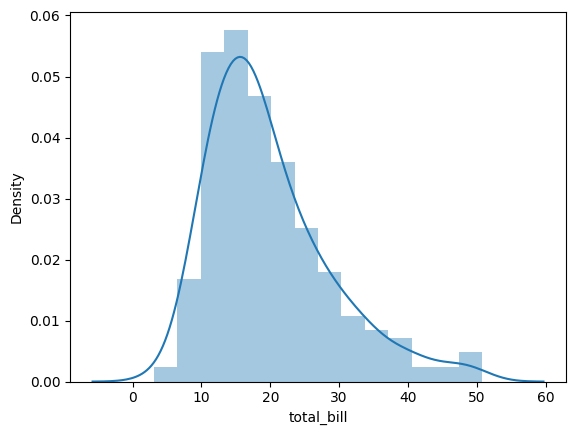

In [4]:
sns.distplot(tips['total_bill']) # Creates a distribution plot for the 'total_bill' column in the 'tips' DataFrame.
# Safe to ignore warnings # A comment indicating that warnings can be ignored.

To remove the kde layer and just have the histogram use:

/tmp/ipython-input-4053615576.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'],kde=False,bins=30) # Creates a histogram of 'total_bill' without the kernel density estimate and with 30 bins.


<Axes: xlabel='total_bill'>

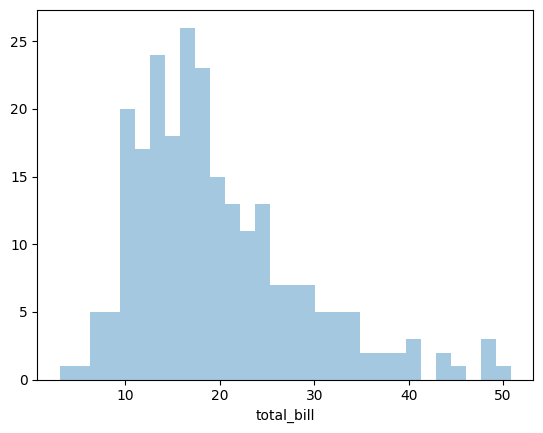

In [5]:
sns.distplot(tips['total_bill'],kde=False,bins=30) # Creates a histogram of 'total_bill' without the kernel density estimate and with 30 bins.

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with:
* “scatter”
* “reg”
* “resid”
* “kde”
* “hex”

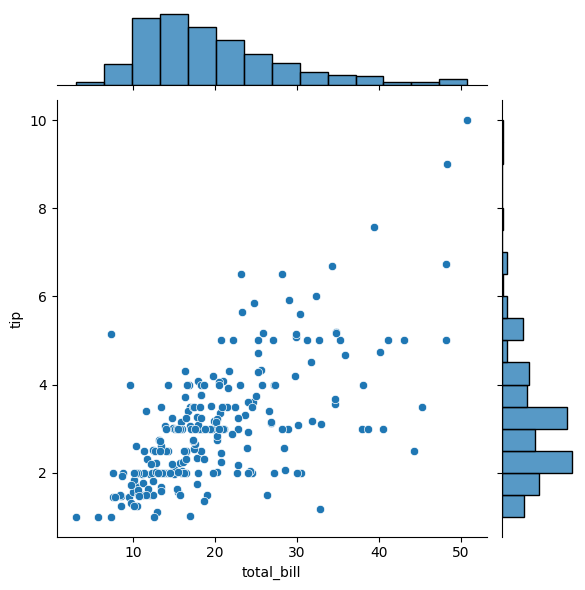

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter') # Creates a joint plot of 'total_bill' and 'tip' with a scatter plot in the center.

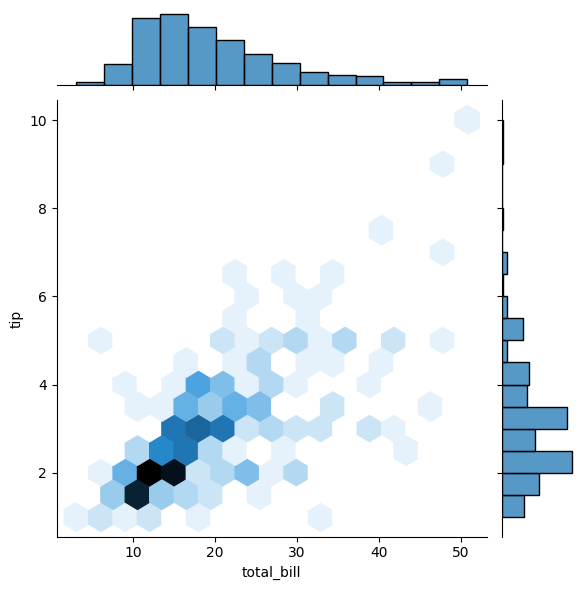

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex') # Creates a joint plot of 'total_bill' and 'tip' with a hexagonal binning plot in the center.

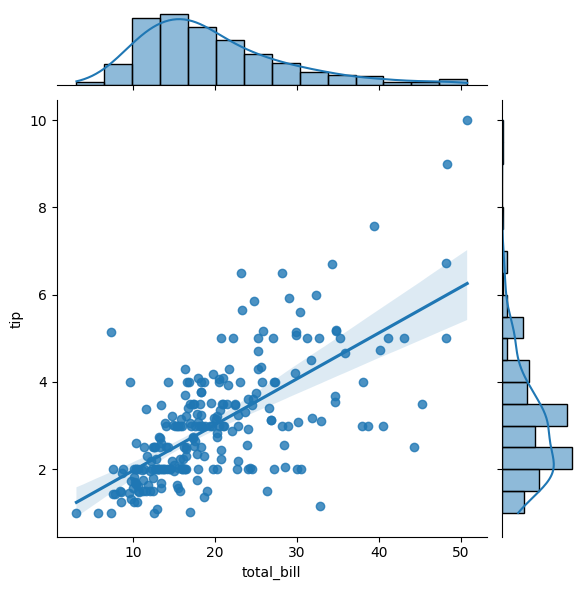

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg') # Creates a joint plot of 'total_bill' and 'tip' with a linear regression plot in the center.

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).

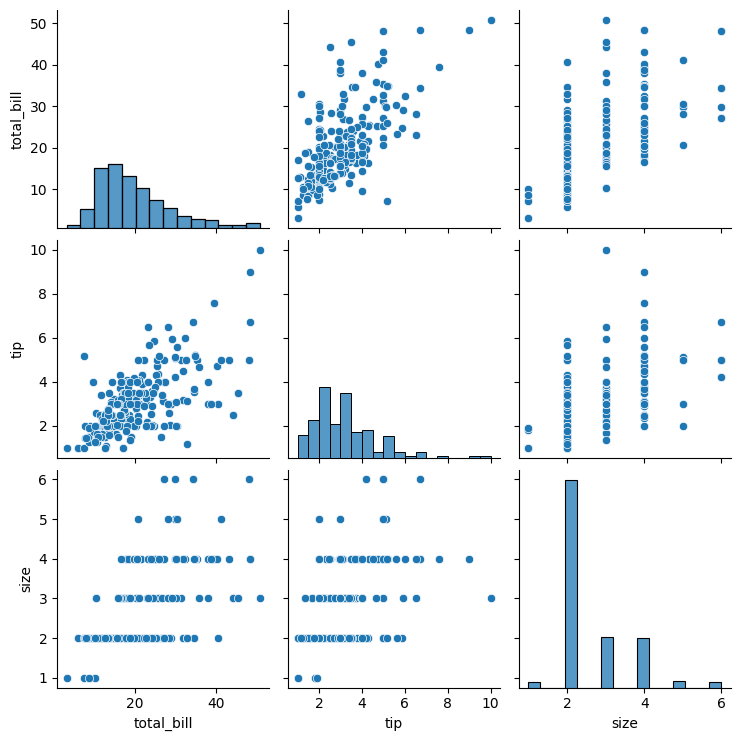

In [9]:
sns.pairplot(tips) # Creates a pair plot for all numerical columns in the 'tips' DataFrame.

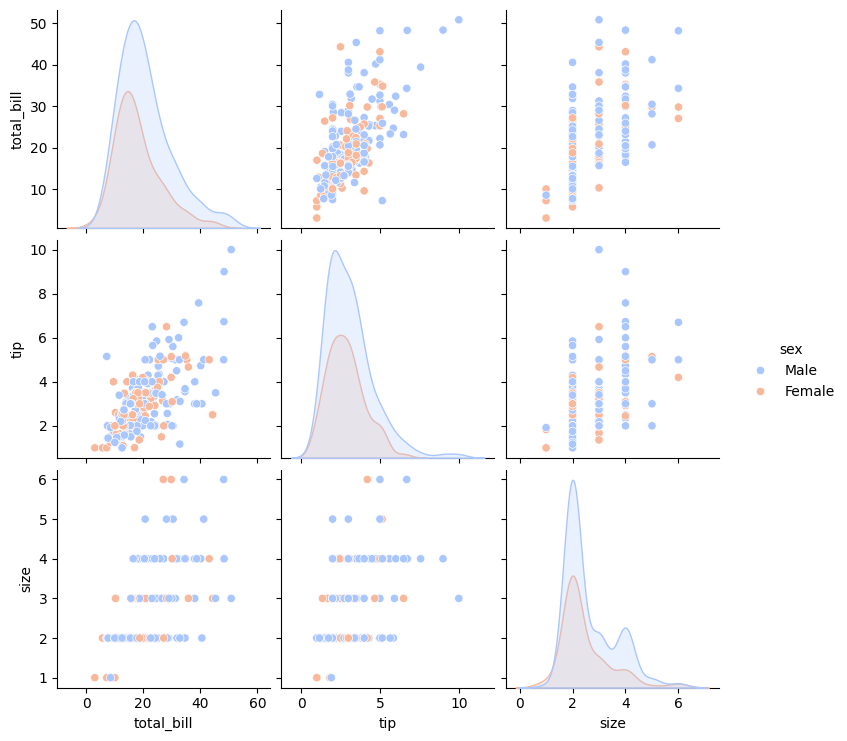

In [10]:
sns.pairplot(tips,hue='sex',palette='coolwarm') # Creates a pair plot, coloring points by 'sex' and using the 'coolwarm' palette.

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<Axes: xlabel='total_bill'>

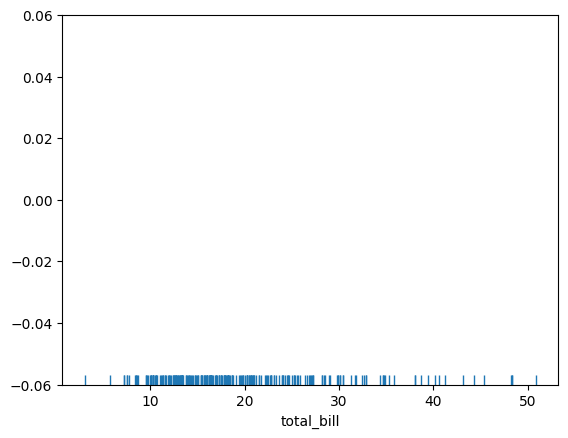

In [11]:
sns.rugplot(tips['total_bill']) # Creates a rug plot for the 'total_bill' column.

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

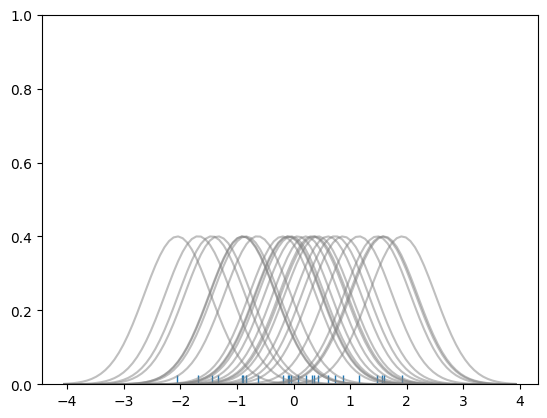

In [12]:
# Don't worry about understanding this code! # An introductory comment for the code block.
# It's just for the diagram below # Another introductory comment.
import numpy as np # Imports the numpy library and aliases it as `np`.
import matplotlib.pyplot as plt # Imports the matplotlib.pyplot module and aliases it as `plt`.
from scipy import stats # Imports the `stats` module from the scipy library.

#Create dataset # Comment for the next line.
dataset = np.random.randn(25) # Creates a dataset of 25 random numbers from a standard normal distribution.

# Create another rugplot # Comment for the next line.
sns.rugplot(dataset); # Creates a rug plot for the `dataset`.

# Set up the x-axis for the plot # Comment for the next line.
x_min = dataset.min() - 2 # Calculates the minimum x-axis value.
x_max = dataset.max() + 2 # Calculates the maximum x-axis value.

# 100 equally spaced points from x_min to x_max # Comment for the next line.
x_axis = np.linspace(x_min,x_max,100) # Creates an array of 100 evenly spaced points between `x_min` and `x_max`.

# Set up the bandwidth, for info on this: # Comment for the next line.
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth' # Defines a URL for bandwidth information.

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2 # Calculates the bandwidth for Kernel Density Estimation.


# Create an empty kernel list # Comment for the next line.
kernel_list = [] # Initializes an empty list to store kernel functions.

# Plot each basis function # Comment for the next line.
for data_point in dataset: # Loops through each data point in the `dataset`.

    # Create a kernel for each point and append to list # Comment for the next line.
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis) # Creates a normal distribution (kernel) for each data point.
    kernel_list.append(kernel) # Appends the generated kernel to the `kernel_list`.

    #Scale for plotting # Comment for the next line.
    kernel = kernel / kernel.max() # Scales the kernel to a maximum of 1.
    kernel = kernel * .4 # Further scales the kernel for plotting.
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5) # Plots the scaled kernel function.

plt.ylim(0,1) # Sets the y-axis limits for the plot.

Text(0.5, 0.98, 'Sum of the Basis Functions')

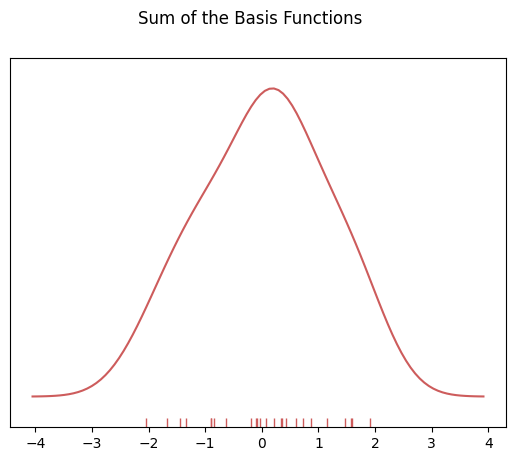

In [13]:
# To get the kde plot we can sum these basis functions. # Explanatory comment.

# Plot the sum of the basis function # Comment for the next line.
sum_of_kde = np.sum(kernel_list,axis=0) # Calculates the sum of all kernel functions.

# Plot figure # Comment for the next line.
fig = plt.plot(x_axis,sum_of_kde,color='indianred') # Plots the sum of the kernels.

# Add the initial rugplot # Comment for the next line.
sns.rugplot(dataset,c = 'indianred') # Adds a rug plot to the current figure.

# Get rid of y-tick marks # Comment for the next line.
plt.yticks([]) # Removes the y-axis tick marks.

# Set title # Comment for the next line.
plt.suptitle("Sum of the Basis Functions") # Sets the main title of the plot.

So with our tips dataset:

<Axes: xlabel='total_bill', ylabel='Density'>

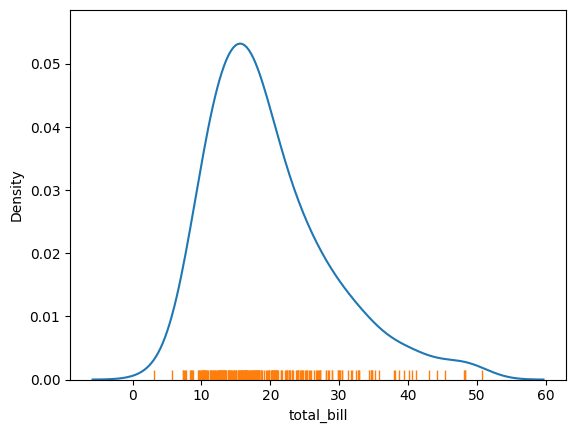

In [14]:
sns.kdeplot(tips['total_bill']) # Creates a Kernel Density Estimate plot for 'total_bill'.
sns.rugplot(tips['total_bill']) # Adds a rug plot for 'total_bill' to the same figure.

<Axes: xlabel='tip', ylabel='Density'>

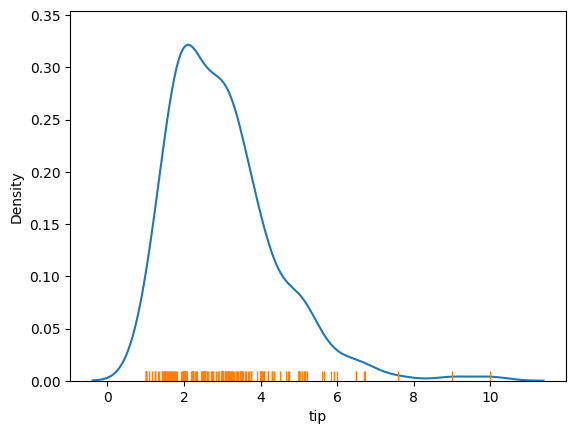

In [15]:
sns.kdeplot(tips['tip']) # Creates a Kernel Density Estimate plot for 'tip'.
sns.rugplot(tips['tip']) # Adds a rug plot for 'tip' to the same figure.

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [16]:
import seaborn as sns # Imports the seaborn library and aliases it as `sns`.
%matplotlib inline # Configures matplotlib to display plots directly in the notebook output.

UsageError: unrecognized arguments: # Configures matplotlib to display plots directly in the notebook output.


In [17]:
tips = sns.load_dataset('tips') # Loads the 'tips' dataset from seaborn's built-in datasets.
tips.head() # Displays the first 5 rows of the 'tips' DataFrame.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<Axes: xlabel='sex', ylabel='total_bill'>

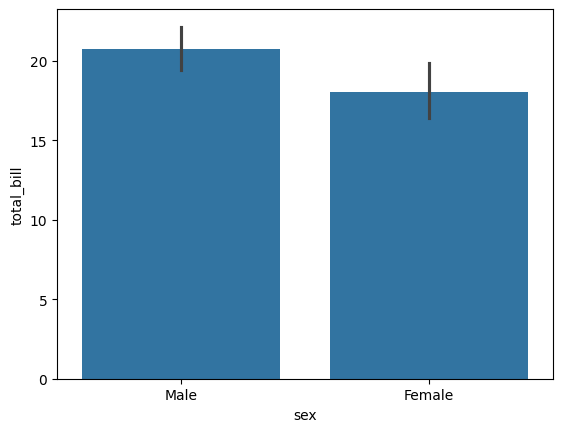

In [18]:
sns.barplot(x='sex',y='total_bill',data=tips) # Creates a bar plot of 'total_bill' grouped by 'sex', showing the mean by default.

In [19]:
import numpy as np # Imports the numpy library and aliases it as `np`.

You can change the estimator object to your own function, that converts a vector to a scalar:

In [ ]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std) # Creates a bar plot of 'total_bill' grouped by 'sex', showing the standard deviation as the estimator.

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

In [ ]:
sns.countplot(x='sex',data=tips) # Creates a count plot of the 'sex' column, showing the number of occurrences for each category.

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

In [ ]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow') # Creates a box plot of 'total_bill' by 'day', using the 'rainbow' color palette.

In [ ]:
# Can do entire dataframe with orient='h' # Comment explaining the next line.
sns.boxplot(data=tips,palette='rainbow',orient='h') # Creates horizontal box plots for all numerical columns in the 'tips' DataFrame.

In [ ]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm") # Creates box plots of 'total_bill' by 'day', with boxes split by 'smoker' status and using the 'coolwarm' palette.

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow') # Creates a violin plot of 'total_bill' by 'day', using the 'rainbow' color palette.

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1') # Creates violin plots of 'total_bill' by 'day', with violins colored by 'sex' and using the 'Set1' palette.

In [ ]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1') # Creates violin plots of 'total_bill' by 'day', with violins split by 'sex' and using the 'Set1' palette.

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips, palette='rainbow') # Creates a strip plot of 'total_bill' by 'day', using the 'rainbow' color palette.

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True, palette='rainbow') # Creates a strip plot with jitter to prevent overlapping points, using the 'rainbow' color palette.

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1') # Creates a strip plot of 'total_bill' by 'day', with jitter, colored by 'sex', and using the 'Set1' palette.

In [ ]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',dodge=True) # Creates a strip plot with jitter, colored by 'sex', using the 'Set1' palette, and separating (dodging) points by hue.

In [ ]:
sns.swarmplot(x="day", y="total_bill", data=tips) # Creates a swarm plot of 'total_bill' by 'day', adjusting points to prevent overlap.

### Combining Categorical Plots

In [ ]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow') # Creates a violin plot of 'tip' by 'day', using the 'rainbow' color palette.
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3) # Overlays a swarm plot of 'tip' by 'day' in black with smaller points.

## catplot

factorplot is the most general form of a categorical plot. It can take in a kind parameter to adjust the plot type:

In [ ]:
sns.catplot(x='sex',y='total_bill',data=tips,kind='bar') # Creates a categorical plot (bar plot in this case) of 'total_bill' by 'sex'.

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [ ]:
import seaborn as sns # Imports the seaborn library and aliases it as `sns`.
%matplotlib inline # Configures matplotlib to display plots directly in the notebook output.

In [ ]:
flights = sns.load_dataset('flights') # Loads the 'flights' dataset from seaborn's built-in datasets.

In [ ]:
tips = sns.load_dataset('tips') # Loads the 'tips' dataset from seaborn's built-in datasets.

In [ ]:
tips.head() # Displays the first 5 rows of the 'tips' DataFrame.

In [ ]:
flights.head() # Displays the first 5 rows of the 'flights' DataFrame.

## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [ ]:
tips.head() # Displays the first 5 rows of the 'tips' DataFrame.

In [ ]:
# Matrix form for correlation data # Comment indicating the purpose of the next line.
tips.corr() # Calculates the pairwise correlation of columns in the 'tips' DataFrame.

In [ ]:
sns.heatmap(tips.corr()) # Creates a heatmap of the correlation matrix of the 'tips' DataFrame.

In [ ]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True) # Creates a heatmap of the correlation matrix, using the 'coolwarm' colormap and annotating cells with their values.

Or for the flights data:

In [ ]:
flights.pivot_table(values='passengers',index='month',columns='year') # Creates a pivot table from the 'flights' DataFrame, with months as index, years as columns, and passenger counts as values.

In [ ]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year') # Creates and stores a pivot table from the 'flights' DataFrame.
sns.heatmap(pvflights) # Creates a heatmap of the `pvflights` pivot table.

In [ ]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1) # Creates a heatmap of `pvflights` with the 'magma' colormap, white lines between cells, and a linewidth of 1.

## clustermap

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

In [ ]:
sns.clustermap(pvflights) # Creates a clustered heatmap of the `pvflights` pivot table.

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

In [ ]:
# More options to get the information a little clearer like normalization # Comment explaining the next line.
sns.clustermap(pvflights,standard_scale=1) # Creates a clustered heatmap of `pvflights`, standardizing the data along the columns.

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [ ]:
import seaborn as sns # Imports the seaborn library and aliases it as `sns`.
%matplotlib inline # Configures matplotlib to display plots directly in the notebook output.

In [ ]:
tips = sns.load_dataset('tips') # Loads the 'tips' dataset from seaborn's built-in datasets.

In [ ]:
tips.head() # Displays the first 5 rows of the 'tips' DataFrame.

## lmplot()

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips) # Creates a linear model plot (scatterplot with regression line) of 'tip' vs 'total_bill'.

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex') # Creates a linear model plot, coloring points and regression lines by 'sex'.

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm') # Creates a linear model plot, coloring points and regression lines by 'sex' using the 'coolwarm' palette.

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex') # Creates separate linear model plots for 'tip' vs 'total_bill' for each 'sex' in different columns.

In [ ]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips) # Creates a grid of linear model plots, with rows defined by 'sex' and columns by 'time'.

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm') # Creates a grid of linear model plots, with columns by 'day', points colored by 'sex', and using the 'coolwarm' palette.

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **height** and **aspect** parameters:

In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm', # Starts a linear model plot with 'total_bill' and 'tip', columns by 'day', colored by 'sex', and using 'coolwarm'.
          aspect=0.6,height=8) # Sets the aspect ratio and height for each facet of the plot.

### Reference:

* https://seaborn.pydata.org/ - Seaborn: statistical data visualization


* https://seaborn.pydata.org/tutorial/color_palettes.html - Color palettes